In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col=0)
train.head()

,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
id,,,,,,,,,,,,,,,,,,,,,
2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv', index_col=0)
test.head()

,SMILES,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
id,,,,,,,,,,,,,,,,,,,,,
1022,CCOC(=O)c1ccc(O)cc1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146,CCCCCCc1ccc(O)cc1O,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,ClCBr,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,C=CCCCCCCCC,1,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342,Fc1ccc(cc1)C(F)(F)F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.drop('SMILES', axis=1, inplace=True)
test.drop('SMILES', axis=1, inplace=True)

In [5]:
train.describe()

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.0,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,0.007137,...,0.001127,0.000751,0.0,0.001878,0.0,0.0,0.0,0.0,0.0,0.0
std,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,0.092695,...,0.033558,0.027405,0.0,0.058126,0.0,0.0,0.0,0.0,0.0,0.0
min,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 2175 to 1673
Columns: 425 entries, Tm to Group 424
dtypes: float64(1), int64(424)
memory usage: 8.7 MB


C:\Users\Avishka\AppData\Local\Temp\ipykernel_22592\2446559757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Tm'], color = 'red')


<Axes: xlabel='Tm', ylabel='Density'>

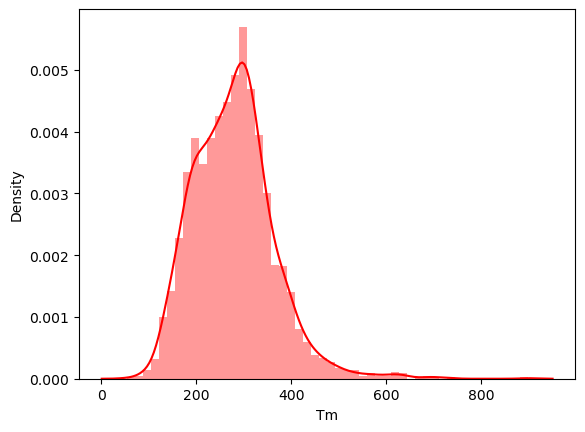

In [7]:
sns.distplot(train['Tm'], color = 'red')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = train.drop('Tm', axis=1)
y = train['Tm'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linreg = LinearRegression()
linreg.fit(scaled_x_train, y_train)
pred = linreg.predict(scaled_x_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test, pred)   

38.50784340921546

In [16]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

13.887119307662255 %


In [17]:
mean_squared_error(y_test, pred) ** 0.5

57.049922119769384

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knn = KNeighborsRegressor()
knn.fit(scaled_x_train, y_train)
pred = knn.predict(scaled_x_test)

In [24]:
mean_absolute_error(y_test, pred)

46.721702127659576

In [26]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

16.84929080054875 %


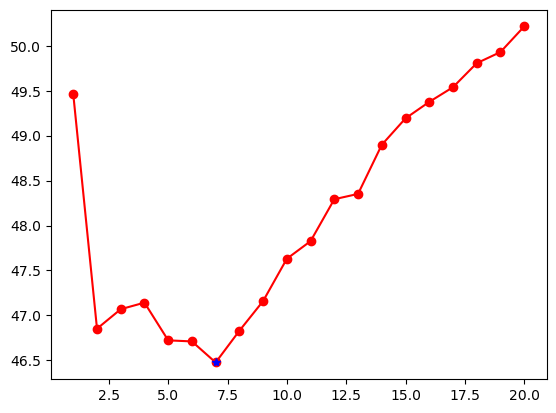

In [27]:
error = np.zeros(20)
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaled_x_train, y_train)
    pred = knn.predict(scaled_x_test)
    error[k-1] = mean_absolute_error(y_test, pred)

plt.plot(range(1, 21), error, 'ro-')
plt.plot(error.argmin()+1, error.min(), 'b*')

In [28]:
best_k = error.argmin()+1
print(best_k)

7


In [29]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(scaled_x_train, y_train)
pred = knn.predict(scaled_x_test)

In [30]:
mean_absolute_error(y_test, pred)

46.475460396924724

In [31]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

16.76048841665774 %


In [32]:
mean_squared_error(y_test, pred) ** 0.5

67.18063604874679

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtree = DecisionTreeRegressor()
dtree.fit(scaled_x_train, y_train)
pred = dtree.predict(scaled_x_test)

In [35]:
mean_absolute_error(y_test, pred)

44.8196847249538

In [36]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

16.16336449935517 %


In [37]:
mean_squared_error(y_test, pred) ** 0.5

65.52284788389854

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr = RandomForestRegressor()
rfr.fit(scaled_x_train, y_train)
pred = rfr.predict(scaled_x_test)

In [40]:
mean_absolute_error(y_test, pred)

36.424302220814205

In [41]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

13.135729915161706 %


In [42]:
mean_squared_error(y_test, pred) ** 0.5

55.63805255596737

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb = XGBRegressor()
xgb.fit(scaled_x_train, y_train)
pred = xgb.predict(scaled_x_test)

In [46]:
mean_absolute_error(y_test, pred)

36.43059741653996

In [47]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

13.138000157438837 %


In [48]:
mean_squared_error(y_test, pred) ** 0.5

54.60229016027086

In [50]:
from lightgbm import LGBMRegressor

In [51]:
lgbm = LGBMRegressor()
lgbm.fit(scaled_x_train, y_train)
pred = lgbm.predict(scaled_x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 1863, number of used features: 76
[LightGBM] [Info] Start training from score 278.680168


c:\Users\Avishka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [55]:
mean_absolute_error(y_test, pred)

41.39654257084928

In [56]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

14.928873567314005 %


In [57]:
mean_squared_error(y_test, pred) ** 0.5

60.724727663378744

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
rf = RandomForestRegressor()
param_dist = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error',
    random_state=42
)

random_search.fit(scaled_x_train, y_train)  

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,20
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
random_search.best_estimator_

,n_estimators,200
,criterion,'squared_error'
,max_depth,30
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
pred = random_search.predict(scaled_x_test)

In [62]:
mean_absolute_error(y_test, pred)

37.3757014172362

In [63]:
print(mean_absolute_error(y_test, pred) / np.mean(y_test) * 100, '%')

13.478833890357688 %


In [64]:
mean_squared_error(y_test, pred) ** 0.5

55.05934530724803

In [66]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(x)
scaled_test=scaler.transform(test)

In [67]:
rf=RandomForestRegressor(n_estimators=200,max_depth=30,min_samples_split=10,min_samples_leaf=1)
rf.fit(scaled_train,y)
pred=rf.predict(scaled_test)

In [68]:
final = pd.read_csv('sample_submission.csv', index_col=0)

Finalized

In [2]:
final['Tm'] = pred

NameError: name 'pred' is not defined

In [ ]:
final.to_csv('submission.csv')  

In [ ]:
import joblib

joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


NameError: name 'rf' is not defined